# IMPORTANT

In [ ]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

In [1]:
import pandas as pd
import numpy as np
from pandas.stats.api import ols
import statsmodels.formula.api as smf
from sklearn import linear_model
import scipy.stats as stats
import pylab
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


/Users/alexandershannon/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

<font color='blue'>Conjugate priors are Baysian Priors (probability distributions expressing one's beliefs about certain quantities before evidence is taken into account) that are in the same family of parameterized distributions as the posterior distribution; they are useful in that they reduce Bayesian updating to modifying the parameters of the prior distribution, rather than computing sometimes-tricky integrals. </font>

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

<font color='blue'>**TRUE** Gaussians are self-congugate, therefore this holds true. </font>

# Task 2 (5 pts). 


**1) In the Bayesian linear regression framework (True or False)**  

   a) Using a Laplacian prior will lead to the Ridge Regression **FALSE**

   b) Using a Laplacian prior will lead to Lasso Regression **TRUE**

**2) (True or False)  **

   a) Ridge can often help with feature selection **False: primarily for coefficient shrinkage and reducing model complexity**

   b) Lasso can often help with feature selection **TRUE**

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients? **RIDGE** 

1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients? **LASSO**

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form? **RIDGE**

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors? **LASSO**

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression? **λ = 0**

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge? **VALIDATION**


# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

<font color='blue'>For highly correlated variables, it makes the most sense to use **Ridge**, as Lasso will somewhat arbitrarily select a specific feature among those that are highly correlated, doing away with the rest of them by setting them to zero (which is sometimes what we want, especially for feature selection - but likely not in this case!). Ridge, on the other hand will include all of the variables, but the coefficient values will be distributed among them, depending on how the variables are correlated.</font>

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [2]:
x = np.array(4)
y = np.array(14)
sigma = 2
sigma_star = 2
w_star = 4

denominator = (x**2).sum() / sigma**2 + 1. / sigma_star**2
mu_posterior = (x.dot(y) / sigma**2 + w_star / sigma_star**2) / denominator 
sigma_posterior = 1. / np.sqrt(denominator)
w4_prob = stats.norm.cdf(4, mu_posterior, sigma_posterior)

print('Posterior Distribution = (' + str(round(mu_posterior,5))+', '+str(round(sigma_posterior,5))+')')
print('Probability that w < 4 = ' + str(round(w4_prob, 5)))

Posterior Distribution = (3.52941, 0.48507)
Probability that w < 4 = 0.83401


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [3]:
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

# Rename last column to 'y'
data_train.rename(columns={'40':'y'}, inplace=True)
data_test.rename(columns={'40':'y'}, inplace=True)

for i in data_test.columns[:-1]:
    data_test.rename(columns={i:'x'+str(i)}, inplace=True)
for i in data_train.columns[:-1]:
    data_train.rename(columns={i:'x'+str(i)}, inplace=True)
    
data_train.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,y
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305


In [4]:
list_comp=data_train.columns[:-1]
list_comp=list(list_comp.values.tolist())

# In Sample R_2 Calculation
X=data_train[list_comp]
y=data_train['y']
result=ols(y=y,x=X)
print('In-Sample (Training Set) R_2: ',result.r2)

# Out of Sample R_2 Calculation
temp=data_test[list_comp]
a=np.array(temp)
b=np.array(result.beta)
c=np.sum(a*b[0:-1],axis=1)+b[-1]

X_test=np.matrix(data_test[list_comp])
y_test=np.array(data_test['y'])

error=data_test['y']-c
R_2=1-error.var()/data_test['y'].var()
if R_2>0:
    print('Out-Sample (Test Set) R_2:    ', R_2)
else:
    print('Out-Sample (Test Set) R_2:    ', 0.0)

In-Sample (Training Set) R_2:  1.0
Out-Sample (Test Set) R_2:     0.0


/Users/alexandershannon/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [5]:
data_train_y = data_train['y']
data_train_X = data_train.drop(['y'],axis=1)

data_test_y = data_test['y']
data_test_X = data_test.drop(['y'],axis=1)

data_train_X.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,75.825672,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,53.341089,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,51.839900,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789


In [6]:
# Ridge
Ridge=linear_model.Ridge(fit_intercept=False, alpha=3000)

Ridge.fit(data_train_X, data_train_y)
# In the sample:
p_IS=Ridge.predict(data_train_X)
err_IS=p_IS-data_train_y
R_2_IS_Ridge=1-np.var(err_IS)/np.var(data_train_y)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(data_test_X)
err_OS=p_OS-data_test_y
R_2_OS_Ridge=1-np.var(err_OS)/np.var(data_test_y)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.9183458259098474
The R-squared we found for OS Ridge is: 0.5227726341237318


In [7]:
# Lasso
Lasso=linear_model.Lasso(fit_intercept=False,alpha=30)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(data_train_X, data_train_y)
# In the sample:
p_IS=Lasso.predict(data_train_X)
err_IS=p_IS-data_train_y
R_2_IS_Lasso=1-np.var(err_IS)/np.var(data_train_y)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(data_test_X)
err_OS=p_OS-data_test_y
R_2_OS_Lasso=1-np.var(err_OS)/np.var(data_test_y)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.9183458259098474
The R-squared we found for OS Lasso is: 0.6374627410895275


/Users/alexandershannon/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

In [8]:
list_comp=data_train.columns[:-1]
list_comp=list(list_comp.values.tolist())
var=len(list_comp)

In [9]:
#In the sample test
Number_variables=[]
OLS_R_2_IS=[] # make a list to store our in the sample R_squared
Ridge_R_2_IS=[]
Lasso_R_2_IS=[]
OLS_R_2_OS=[] #make a list to store our out the sample R_squared
Ridge_R_2_OS=[]
Lasso_R_2_OS=[]
depend_variable=['x0']
t=0

# Do a loop to run OLS after adding additional independent variables from 311 subsequently
for j in ([list_comp[i] for i in range(0, 40)]):

    Number_variables.append(t)

    depend_variable.append(j)
# In the sample:

    X=data_train[depend_variable]
    y=data_train['y']
    result=ols(y=y,x=X)
    OLS_R_2_IS.append(result.r2)
    
    X=np.matrix(data_train[depend_variable])
    y=np.array(data_train['y'])
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
    Lasso=linear_model.Lasso(fit_intercept=True,alpha=30)
    Ridge.fit(X,y)
    Lasso.fit(X,y)
    p_IS=Ridge.predict(X)
    err_IS=p_IS-y
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y)
    p_IS=Lasso.predict(X)
    err_IS=p_IS-y
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y)
    Ridge_R_2_IS.append(R_2_IS_Ridge)
    Lasso_R_2_IS.append(R_2_IS_Lasso)

############################################################################
#Out of the sample test

    temp=data_test[depend_variable]

    a=np.array(temp)
    b=np.array(result.beta)
    c=np.sum(a*b[0:-1],axis=1)+b[-1]
    
    X_test=np.matrix(data_test[depend_variable])
    y_test=np.array(data_test['y'])

    error=data_test['y']-c
    R_2=1-error.var()/data_test['y'].var()
    if R_2>0:
        OLS_R_2_OS.append(R_2)
    else:
        OLS_R_2_OS.append(0)
        
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)

    p_OS=Lasso.predict(X_test)
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test) 
    Ridge_R_2_OS.append(R_2_OS_Ridge)
    Lasso_R_2_OS.append(R_2_OS_Lasso)
    
    t+=1

/Users/alexandershannon/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)

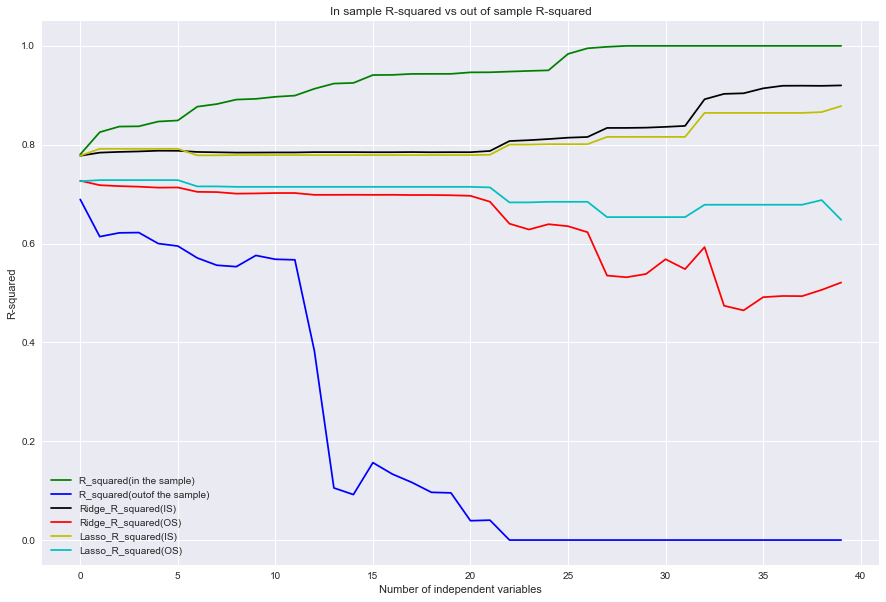

In [10]:
#plot
pylab.figure(figsize=(15,10))
pylab.title('In sample R-squared vs out of sample R-squared')
pylab.plot(Number_variables,OLS_R_2_IS,'g',label='R_squared(in the sample)')
pylab.plot(Number_variables,OLS_R_2_OS,'b',label='R_squared(outof the sample)')
pylab.plot(Number_variables,Ridge_R_2_IS,'k',label='Ridge_R_squared(IS)')
pylab.plot(Number_variables,Ridge_R_2_OS,'r',label='Ridge_R_squared(OS)')
pylab.plot(Number_variables,Lasso_R_2_IS,'y',label='Lasso_R_squared(IS)')
pylab.plot(Number_variables,Lasso_R_2_OS,'c',label='Lasso_R_squared(OS)')
pylab.legend(loc='lower left')
pylab.xlabel('Number of independent variables')
pylab.ylabel('R-squared')
pylab.draw()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

p=0.7
X=data_train[data_train.columns[:-1]]
y=data_train[data_train.columns[-1:]]
lambda_vals = np.linspace(0, 2000, 400)
np.random.seed(42)
splits = []

for i in range(10):
    splits.append(train_test_split(X, y, train_size=p))
    
regression_methods = dict(Ridge=Ridge, Lasso=Lasso)

split_vals = [{label: [model(alpha=lam).fit(X_tr, y_tr).score(X_val, y_val)
            for lam in lambda_vals]
        for label, model in regression_methods.items()}
    for X_tr, X_val, y_tr, y_val in splits]

top_lambda_vals = pd.DataFrame([{label: lambda_vals[np.argmax(scores)]
        for label, scores in models.items()}
    for models in split_vals], index=range(1, 11)).rename_axis('split_no')

print('Lambda values with the highest value for validation R2 by split:')
top_lambda_vals

/Users/alexandershannon/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/alexandershannon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/alexandershannon/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/alexandershannon/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lambda values with the highest value for validation R2 by split:


,Lasso,Ridge
split_no,,
1,145.363409,2000.0
2,110.275689,2000.0
3,85.213033,2000.0
4,55.137845,2000.0
5,65.162907,2000.0
6,120.300752,2000.0
7,90.225564,2000.0
8,100.250627,2000.0
9,65.162907,2000.0


b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)


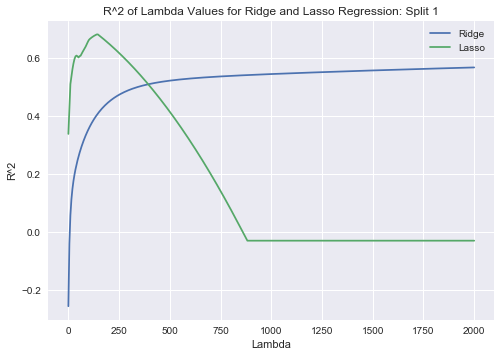

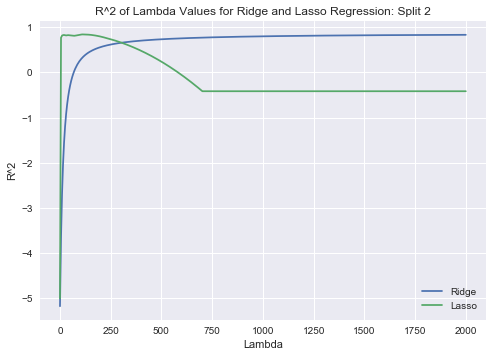

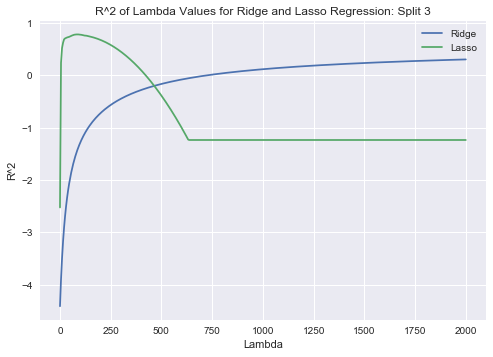

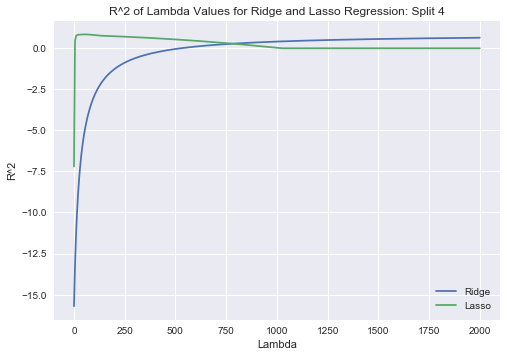

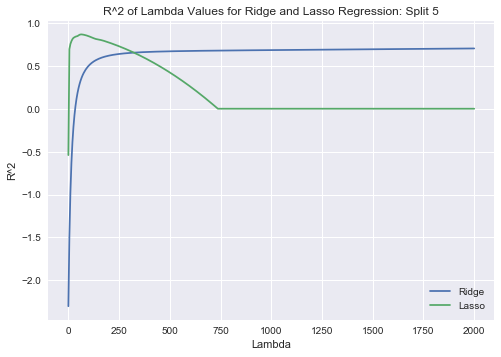

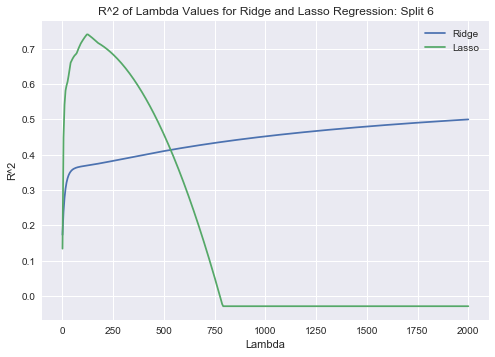

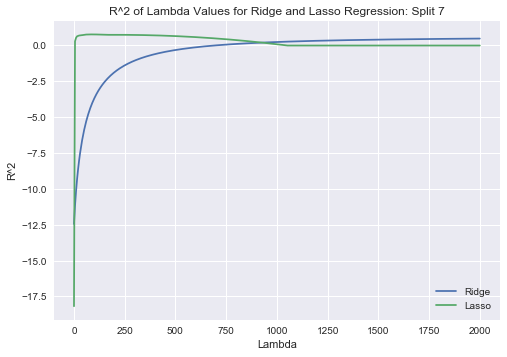

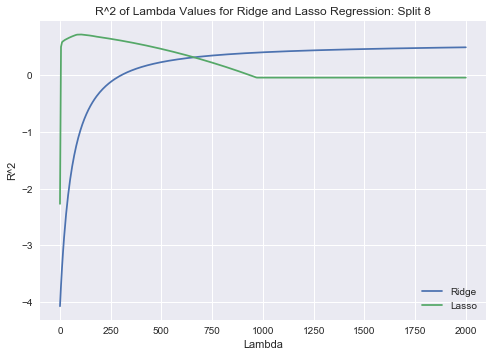

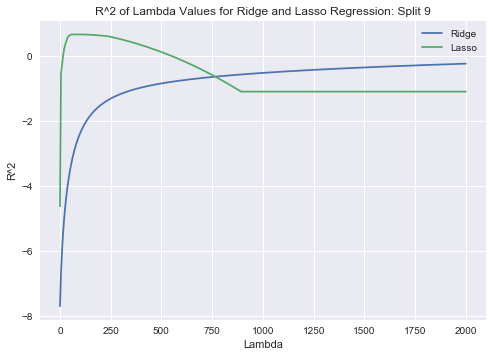

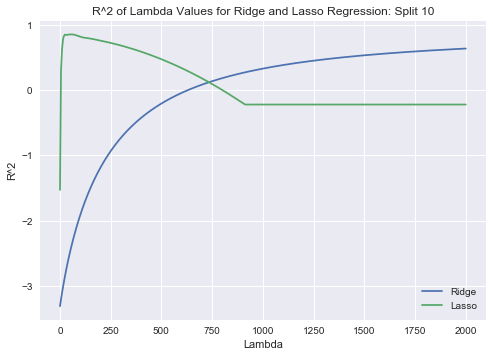

In [13]:
import matplotlib.pyplot as plt

for i, models in enumerate(split_vals, 1):
    for label, scores in models.items():
        plt.plot(lambda_vals, scores, label=label)
    plt.title('R^2 of Lambda Values for Ridge and Lasso Regression: Split {}'.format(i))
    plt.xlabel('Lambda')
    plt.ylabel('R^2')
    plt.legend()
    plt.show()

**Description:** Above we have the graphs of Ridge vs. Lasso Regression. Although there is some variance among the trials, it seems that Ridge nearly always performs better with higher lamdas, while Lasso tends to have its peaks early on (usually before 200), before decending with higher values of lambda. There is not much movement in the graphs after about lambda=1000.

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [14]:
optimal_R2s = pd.DataFrame([{label: model(alpha=lams[label]).fit(X_tr, y_tr).score(X_val, y_val)
        for label, model in regression_methods.items()}
    for (X_tr, X_val, y_tr, y_val), (i, lams) in zip(splits, top_lambda_vals.iterrows())], index=range(1, 11)).rename_axis('split_no')
optimal_R2s.rename(columns={'Lasso':'Lasso_R^2', 'Ridge':'Ridge_R^2'}, inplace=True)
optimal_R2s['Lasso_lambda'],optimal_R2s['Ridge_lambda'] = top_lambda_vals['Lasso'], top_lambda_vals['Ridge']
optimal_R2s = optimal_R2s[['Lasso_lambda', 'Lasso_R^2', 'Ridge_lambda', 'Ridge_R^2']]
optimal_R2s

,Lasso_lambda,Lasso_R^2,Ridge_lambda,Ridge_R^2
split_no,,,,
1,145.363409,0.680538,2000.0,0.566860
2,110.275689,0.839558,2000.0,0.830676
3,85.213033,0.781948,2000.0,0.304166
4,55.137845,0.837939,2000.0,0.636319
5,65.162907,0.865499,2000.0,0.701944
6,120.300752,0.740274,2000.0,0.499902
7,90.225564,0.757340,2000.0,0.467730
8,100.250627,0.721927,2000.0,0.494321
9,65.162907,0.670467,2000.0,-0.231074
